#### intro to gradient descent
fully connected neural networks are a sequence of matrices that map input vectors to output vectors by multiplying the matrices (layers) by intermediate vectors (activations). fitting these matrix products requires that we adjust the weights, or values of the matrices, so that when the input vectors pass through the matrices, we get predicted output vectors close to the true output vectors. 

we start with random weight values and use an optimization algoritm to get close to target output vector *y*. we initialize the matrix weights either manually (such as Xavier: var(weights) = 2/n<sub>in</sub> + n<sub>out</sub>), or with a deep learning library. the optimization algorithm first discussed in the fast.ai deep learning course is gradient descent. there are two flavors of gradient descent: standard and stochastic.

In [1]:
%matplotlib inline

In [2]:
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html = 'html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision = 4, linewidth = 100)

stochastic gradient descent iteratively selects parameters (weights) to reduce the loss function, that is, the method of calculating the difference between the predicted outputs and the true outputs. to illustrate, we start with sum of squared errors as the loss function.  

In [3]:
# start with a line of unknown parameters
def lin(a, b, x): return a*x+b

In [4]:
# create parameters to start
a = 3
b = 8

In [5]:
# randomly generated weights as matrix elements
# a powerful concept: starting with completely random weights yet finding a solution through iteration
n = 30
x = random(n)
y = lin(a, b, x)

In [6]:
x

array([ 0.2278,  0.8118,  0.7782,  0.5558,  0.0277,  0.1952,  0.325 ,  0.0509,  0.7321,  0.1641,
        0.506 ,  0.6623,  0.1484,  0.3603,  0.2467,  0.6473,  0.4571,  0.9375,  0.6178,  0.0699,
        0.8244,  0.8855,  0.9022,  0.6692,  0.1832,  0.9746,  0.3896,  0.7423,  0.8629,  0.1681])

In [7]:
y

array([  8.6833,  10.4354,  10.3345,   9.6674,   8.0831,   8.5856,   8.9749,   8.1527,  10.1963,
         8.4924,   9.518 ,   9.9868,   8.4452,   9.081 ,   8.7402,   9.9418,   9.3712,  10.8125,
         9.8535,   8.2096,  10.4732,  10.6565,  10.7067,  10.0076,   8.5495,  10.9237,   9.1687,
        10.227 ,  10.5888,   8.5044])

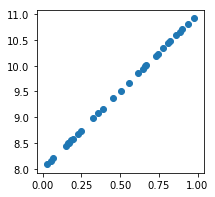

In [8]:
plt.scatter(x, y)

In [9]:
# define our loss function: sum of squared errors
def sse(y, y_pred): return ((y-y_pred)**2).sum()
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)

we want to minimize this averaged loss function value. our linear regression function has two 
numerical inputs: the *x* elements that represents the matrix values, and the *a*, *b* parameters we
specified above. we cannot change the matrix values, so we want our gradient descent optimizer to 
choose parameters that minimize the loss function value. 

In [10]:
# the average loss is high if our guesses are bad, low if our guesses are good
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.0959

gradients are vectors that represent how the loss function changes with respect to each parameter. 
gradient descent entails iteratively calculating the partial derivative of the loss function with respect to each of our parameters and updating the parameters in the direction opposite that derivative. if the derivative of *a* is positive, increasing *a* increases the loss function. we get a positive gradient, so we want to move in the opposite direction by decreasing *a*. likewise, if the derivative is negative, the loss function decreases with each increase in *a* so we want to continue increasing *a*. in both cases, we want to move in the direction opposite the derivative.

gradient descent updates parameter values until it reaches parameter values that can no longer decrease the loss function value. this is the local minimum. 

the size of each of the algorithm's updates is the learning rate. high learning rates cover more ground more quickly, but have a higher risk of overshooting the local minimum. with lower learning rates, the algorithm more frequently takes steps (looks for negative gradients), thus increasing precision but at the expense of speed. 

In [11]:
# define our learning rate as a little step 
# generally want the highest number we can get away with
lr = 0.01 

In [12]:
# define our function for updating weights
# del[(y-(a*x+b))**2, b] = 2(b +a*x -y) = 2(y_pred - y)
# del[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db 
def update_weights():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y) # as b increases one unit, sse changes by 2 * (y_pred - y)
    dyda = x * dydb # as a increases one unit, sse changes by x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [13]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): update_weights()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)

In [14]:
ani